<a href="https://colab.research.google.com/github/Void-Brain70/Deep_Learning/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files 
from IPython.display import Image
u = files.upload()

Saving Cifar10.PNG to Cifar10.PNG


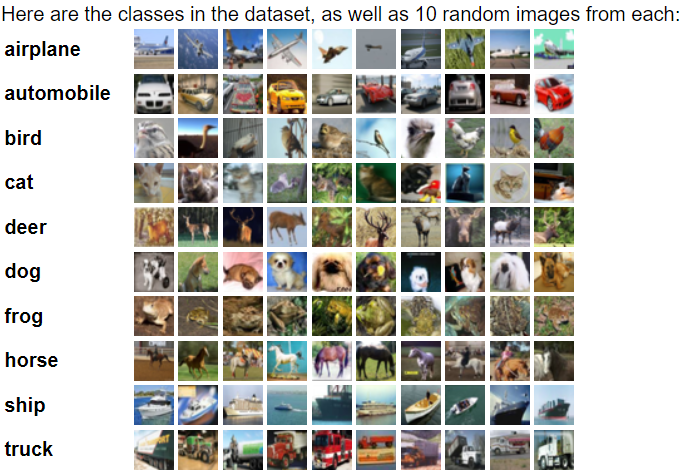

In [18]:
Image('Cifar10.PNG',width=900)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
# reshape 2d to 1d 
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
classes[8]

'ship'

In [14]:
def Showimage(x,y,i):
 plt.figure(figsize=(15,2))
 plt.imshow(x[i])
 plt.xlabel(classes[y[i]])

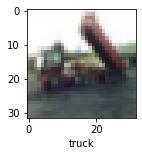

In [15]:
Showimage(x_train,y_train,2)

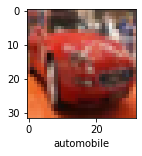

In [16]:
Showimage(x_train,y_train,5)

In [19]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [23]:
from google.colab import files 
from IPython.display import Image
u = files.upload()

Saving cross.PNG to cross.PNG


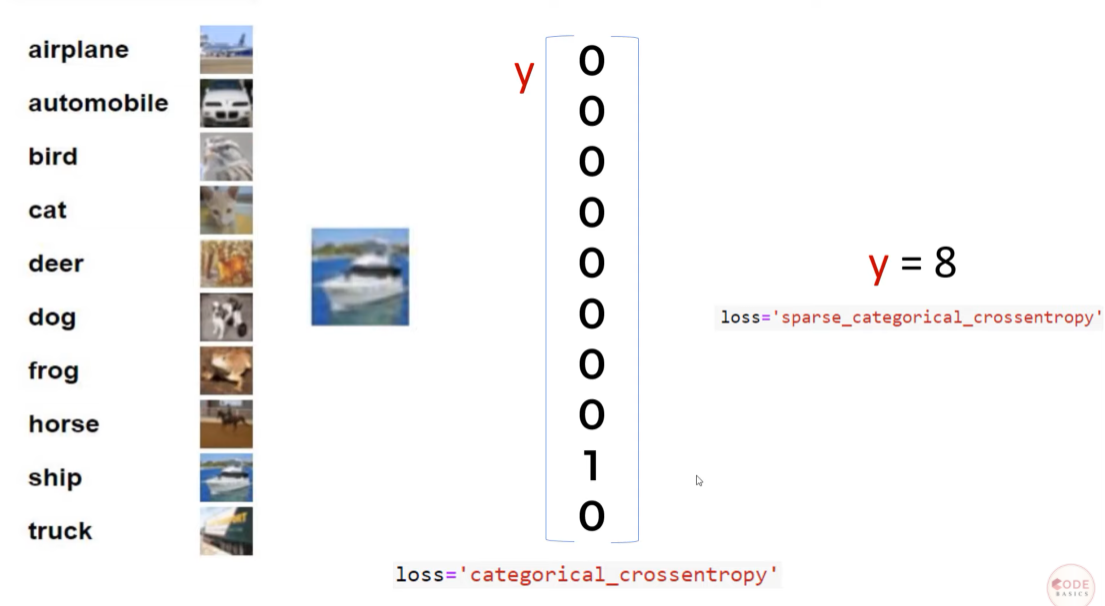

In [24]:
Image('cross.PNG',width=700)

In [22]:
# ANN model build
# 32*32*3 = 3072
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# ANN model compile
ann.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the ANN
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.8130 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.6272 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5441 - accuracy: 0.4545
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4842 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4357 - accuracy: 0.4944


In [26]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.5547 - accuracy: 0.4410


[1.5547224283218384, 0.4410000145435333]

In [27]:
# Classification Report
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report->",classification_report(y_test,y_pred_classes))


Classification Report->               precision    recall  f1-score   support

           0       0.58      0.52      0.55      1000
           1       0.70      0.44      0.54      1000
           2       0.37      0.35      0.36      1000
           3       0.44      0.12      0.19      1000
           4       0.48      0.21      0.30      1000
           5       0.39      0.37      0.38      1000
           6       0.58      0.44      0.50      1000
           7       0.27      0.85      0.41      1000
           8       0.74      0.47      0.57      1000
           9       0.49      0.63      0.55      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.44     10000
weighted avg       0.50      0.44      0.44     10000



In [28]:
# CNN Dense model build
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# CNN model compile
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the CNN
cnn.fit(x_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4467 - accuracy: 0.4820
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1038 - accuracy: 0.6135
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9697 - accuracy: 0.6604
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8808 - accuracy: 0.6944
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8129 - accuracy: 0.7152


In [ ]:
# for sigmoid
# class 1 = 0.45
# class 2 = 0.67

# for softmax
# class 1 (0.45)/(0.45+0.67)
# class 1 (0.67)/(0.45+0.67)

In [29]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9212 - accuracy: 0.6815


[0.9211656451225281, 0.6815000176429749]

In [30]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

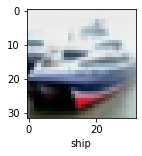

In [31]:
Showimage(x_test,y_test,1)

In [32]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[6.55352324e-02, 3.55128828e-03, 5.66309178e-03, 6.62254930e-01,
        9.37990844e-04, 1.49146974e-01, 9.42921918e-03, 4.03061975e-03,
        9.67349261e-02, 2.71575898e-03],
       [1.03994526e-01, 3.01506817e-02, 7.70749393e-05, 1.35082191e-05,
        9.62439844e-06, 1.40137431e-07, 2.86496788e-06, 5.32625108e-06,
        8.62023711e-01, 3.72255733e-03],
       [8.97983611e-02, 2.30559856e-01, 2.17813486e-03, 9.82446037e-03,
        3.41395591e-03, 1.30882347e-03, 4.70069179e-04, 2.91160750e-03,
        5.97392917e-01, 6.21417873e-02],
       [7.75054455e-01, 2.70411130e-02, 5.21943048e-02, 1.47203740e-03,
        6.62687607e-03, 8.64475660e-05, 9.06673231e-05, 2.50351732e-03,
        1.34074777e-01, 8.55905295e-04],
       [8.70775784e-06, 1.86122634e-05, 2.17128135e-02, 2.53995564e-02,
        6.78293884e-01, 4.14643576e-03, 2.69921958e-01, 3.80239682e-04,
        9.78732933e-05, 1.99172264e-05]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

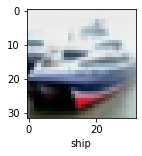

In [36]:
Showimage(x_test,y_test,1)

In [37]:
classes[y_classes[1]]

'ship'

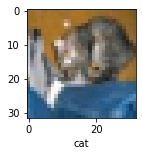

In [38]:
Showimage(x_test,y_test,0)

In [39]:
classes[y_classes[0]]

'cat'

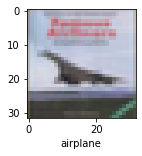

In [40]:
Showimage(x_test,y_test,3)

In [41]:
classes[y_classes[3]]

'airplane'

In [42]:
print("Classification Report->",classification_report(y_test,y_classes))

Classification Report->               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.84      0.79      0.82      1000
           2       0.53      0.61      0.57      1000
           3       0.56      0.43      0.49      1000
           4       0.68      0.53      0.59      1000
           5       0.56      0.62      0.59      1000
           6       0.82      0.69      0.75      1000
           7       0.63      0.82      0.71      1000
           8       0.76      0.80      0.78      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

